## 2021F AML 3104 2 Neural Networks and Deep Learning

### FakeNews Detection using LSTM Neural Network

*Done by,*
**<br>Swathi Gurijila(C0790294)</br>**
**<br>Varadharajan Kalyanaraman(C0793756)</br>**
**<br>Vignesh Kumar Murugananthan(C0793760)</br>**

### Modeling

In [1]:
import pandas as pd
import numpy as np

# Vectorization imports
from sklearn.feature_extraction.text import CountVectorizer

# Training imports
from sklearn.model_selection import train_test_split

# Model imports
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sb

# Validation imports
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# For clean Visualization
import warnings
warnings.filterwarnings('ignore')

# Other required library imports
import itertools
import pickle

In [2]:
vectorizer = CountVectorizer()

### Importing cleaned dataset

In [3]:
df = pd.read_csv("../Dataset/clean_data.csv")
df = df.dropna()
df.head()

,text,label
0,unit state budget fight loom republican flip f...,1
1,unit state militari accept transgend recruit m...,1
2,senior unit state republican senat let mr muel...,1
3,fbi russia probe help australian diplomat tip ...,1
4,trump want postal servic charg much amazon shi...,1


Checking the value counts.

In [4]:
df['label'].value_counts() / 45405

1    0.536285
0    0.463715
Name: label, dtype: float64

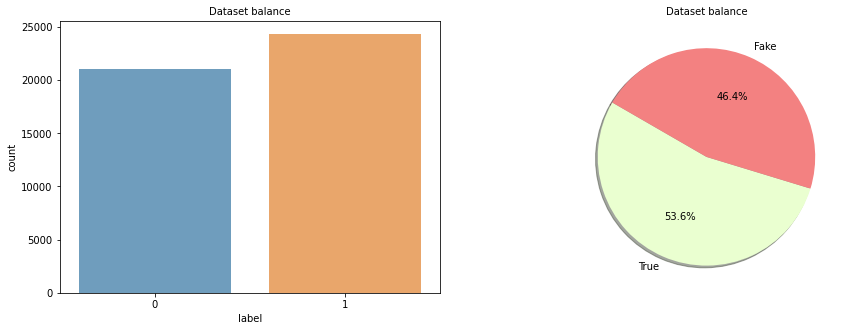

In [5]:
plt.rcParams['figure.figsize'] = 15, 5
plt.subplot(121)
plt.title('Dataset balance', fontsize=10)
s = sb.countplot(x="label", data=df, alpha=0.7)
ax = plt.subplot(122)
_classpie = df['label'].value_counts()
_size = _classpie.values.tolist()
_types = _classpie.axes[0].tolist()
_labels = 'True', 'Fake'
colors = ['#EAFFD0', '#F38181']
plt.title('Dataset balance', fontsize=10)
patches, texts, autotexts = plt.pie(_size,
                                    colors=colors,
                                    labels=_labels,
                                    autopct='%1.1f%%',
                                    shadow=True,
                                    startangle=150)
plt.show()

## Vectorizing the text

In [6]:
X = vectorizer.fit_transform(df['text'].values)
y = df['label']

## Train-test splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0)

## Model evaluations

In [8]:
results = {'Model': [], 'Train-Accuracy': [], 'Test-Accuracy': []}

val_results = {
    'Model': [],
    'Precision (macro)': [],
    'Precision (micro)': [],
    'Recall (macro)': [],
    'Recall (micro)': [],
    'F1-Score (macro)': [],
    'F1-Score (micro)': []
}

Custom functions to plot confusion matrix and accuracy report.

In [9]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
def get_metrics(model, y_train, train_pred, y_test, pred):
    print(30 * '-' + model + 30 * '-')

    taccuracy = round(metrics.accuracy_score(y_train, train_pred), 3)
    print('Training Accuracy: ', taccuracy)

    accuracy = round(metrics.accuracy_score(y_test, pred), 3)
    print('Testing Accuracy:', accuracy)

    results['Model'].append(model)
    results['Train-Accuracy'].append(taccuracy)
    results['Test-Accuracy'].append(accuracy)

    val_results['Model'].append(model)
    val_results['Precision (macro)'].append(
        round(precision_score(y_test, pred, average='macro'), 3))
    val_results['Precision (micro)'].append(
        round(precision_score(y_test, pred, average='micro'), 3))
    val_results['Recall (macro)'].append(
        round(recall_score(y_test, pred, average='macro'), 3))
    val_results['Recall (micro)'].append(
        round(recall_score(y_test, pred, average='micro'), 3))
    val_results['F1-Score (macro)'].append(
        round(f1_score(y_test, pred, average='macro'), 3))
    val_results['F1-Score (micro)'].append(
        round(f1_score(y_test, pred, average='micro'), 3))

    return metrics.classification_report(y_test, pred)

## Model training and testing

### SVM

In [11]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

------------------------------SVM------------------------------
Training Accuracy:  1.0
Testing Accuracy: 0.948
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7020
           1       0.95      0.96      0.95      7964

    accuracy                           0.95     14984
   macro avg       0.95      0.95      0.95     14984
weighted avg       0.95      0.95      0.95     14984



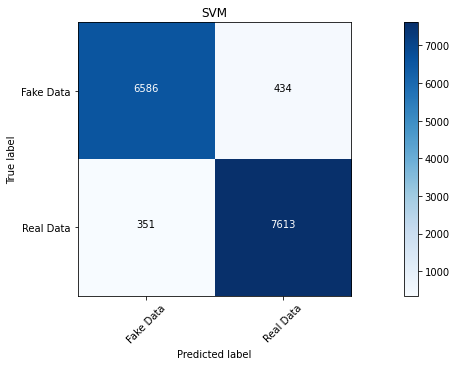

In [12]:
#Training Accuracy
Y_predict = svm_clf.predict(X_train)

#Actual Modeling
svm_pred = svm_clf.predict(X_test)

# Printing training and testing scores
print(get_metrics("SVM", y_train, Y_predict, y_test, svm_pred))

# Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'], title="SVM")

In [13]:
# Saving the trained model
with open("models/normal_svm_clf.pkl", 'wb') as file:
    pickle.dump(svm_clf, file)

### Passive Aggressive Classifier

In [14]:
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

------------------------------Passive Aggressive Classifier------------------------------
Training Accuracy:  1.0
Testing Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7020
           1       0.95      0.96      0.95      7964

    accuracy                           0.95     14984
   macro avg       0.95      0.95      0.95     14984
weighted avg       0.95      0.95      0.95     14984



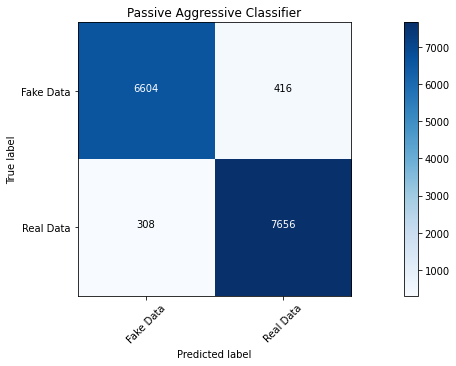

In [15]:
#Training accuracy
Y_predict = linear_clf.predict(X_train)

# Actual modeling
pa_pred = linear_clf.predict(X_test)

# Printing training and testing scores
print(get_metrics("Passive Aggressive Classifier", y_train, Y_predict, y_test, pa_pred))

# Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, pa_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'], title="Passive Aggressive Classifier")

In [16]:
# Saving the trained model
with open("models/normal_linear_clf.pkl", 'wb') as file:
    pickle.dump(linear_clf, file)

### Random Forest

In [17]:
rf_clf = RandomForestClassifier(max_depth=250)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=250)

------------------------------Random Forest Classifier------------------------------
Training Accuracy:  1.0
Testing Accuracy: 0.938
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7020
           1       0.93      0.96      0.94      7964

    accuracy                           0.94     14984
   macro avg       0.94      0.94      0.94     14984
weighted avg       0.94      0.94      0.94     14984



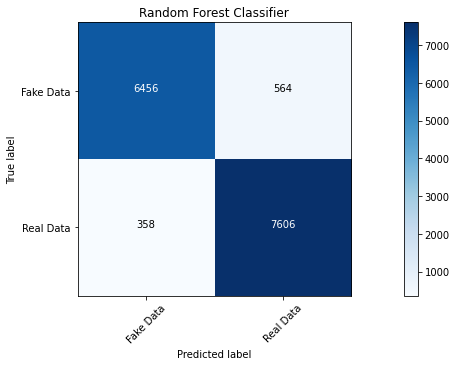

In [18]:
#Training Accuracy
Y_predict = rf_clf.predict(X_train)

# Actual Modeling
rf_pred = rf_clf.predict(X_test)

# Printing training and testing scores
print(get_metrics("Random Forest Classifier", y_train, Y_predict,y_test, rf_pred))

# Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'], title="Random Forest Classifier")

In [19]:
# Saving the trained model
with open("models/normal_rf_clf.pkl", 'wb') as file:
    pickle.dump(rf_clf, file)

### Decision Tree Classifier

In [20]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

------------------------------Decision Tree Classifier------------------------------
Training Accuracy:  1.0
Testing Accuracy: 0.912
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7020
           1       0.91      0.93      0.92      7964

    accuracy                           0.91     14984
   macro avg       0.91      0.91      0.91     14984
weighted avg       0.91      0.91      0.91     14984



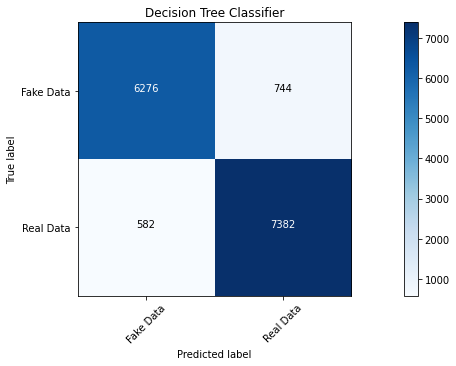

In [21]:
#Training Accuracy
Y_predict = dt_clf.predict(X_train)

# Actual Modeling
dt_pred = dt_clf.predict(X_test)

# Printing training and testing scores
print(get_metrics("Decision Tree Classifier", y_train, Y_predict,y_test, dt_pred))

# Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'], title="Decision Tree Classifier")

In [22]:
# Saving the trained model
with open("models/normal_dt_clf.pkl", 'wb') as file:
    pickle.dump(dt_clf, file)

### XGBoost

In [23]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

[20:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

------------------------------XG Boost Classifier------------------------------
Training Accuracy:  0.994
Testing Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7020
           1       0.96      0.97      0.97      7964

    accuracy                           0.97     14984
   macro avg       0.97      0.96      0.96     14984
weighted avg       0.97      0.97      0.97     14984



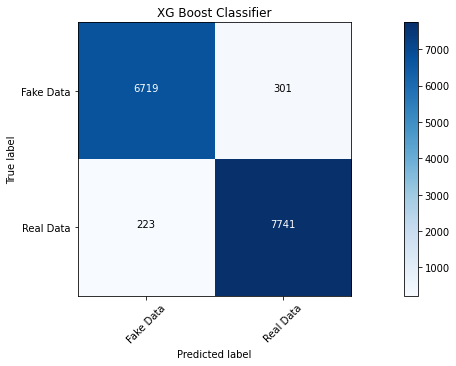

In [24]:
#Training Accuracy
Y_predict = xgb_clf.predict(X_train)

# Actual Modeling
dt_pred = xgb_clf.predict(X_test)

# Printing training and testing scores
print(get_metrics("XG Boost Classifier", y_train, Y_predict,y_test, dt_pred))

# Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'], title="XG Boost Classifier")

In [25]:
# Saving the trained model
with open("models/normal_xgb_clf.pkl", 'wb') as file:
    pickle.dump(xgb_clf, file)

### Naïve Bayes

In [26]:
naive_clf = MultinomialNB(alpha=1.0e-10)
naive_clf.fit(X_train, y_train)

MultinomialNB(alpha=1e-10)

------------------------------Naïve Bayes Classifier------------------------------
Training Accuracy:  0.967
Testing Accuracy: 0.915
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7020
           1       0.93      0.91      0.92      7964

    accuracy                           0.92     14984
   macro avg       0.91      0.92      0.92     14984
weighted avg       0.92      0.92      0.92     14984



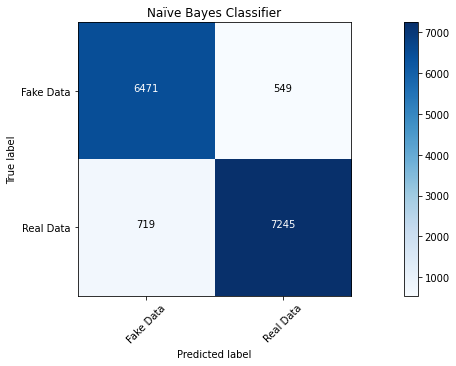

In [27]:
#Training Accuracy
Y_predict = naive_clf.predict(X_train)

# Actual Modeling
dt_pred = naive_clf.predict(X_test)

# Printing training and testing scores
print(get_metrics("Naïve Bayes Classifier", y_train, Y_predict,y_test, dt_pred))

# Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'], title="Naïve Bayes Classifier")

In [28]:
# Saving the trained model
with open("models/normal_naive_clf.pkl", 'wb') as file:
    pickle.dump(naive_clf, file)

## Training and Testing results

In [29]:
results = pd.DataFrame(results)
results

,Model,Train-Accuracy,Test-Accuracy
0,SVM,1.000,0.948
1,Passive Aggressive Classifier,1.000,0.952
2,Random Forest Classifier,1.000,0.938
3,Decision Tree Classifier,1.000,0.912
4,XG Boost Classifier,0.994,0.965
5,Naïve Bayes Classifier,0.967,0.915


In [30]:
val_results = pd.DataFrame(val_results)
val_results

,Model,Precision (macro),Precision (micro),Recall (macro),Recall (micro),F1-Score (macro),F1-Score (micro)
0,SVM,0.948,0.948,0.947,0.948,0.947,0.948
1,Passive Aggressive Classifier,0.952,0.952,0.951,0.952,0.951,0.952
2,Random Forest Classifier,0.939,0.938,0.937,0.938,0.938,0.938
3,Decision Tree Classifier,0.912,0.912,0.910,0.912,0.911,0.912
4,XG Boost Classifier,0.965,0.965,0.965,0.965,0.965,0.965
5,Naïve Bayes Classifier,0.915,0.915,0.916,0.915,0.915,0.915
